In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data

In [2]:
data = pd.read_csv('life_expectancy.csv')

In [6]:
data.head(10)

,Unnamed: 0,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
0,0,Abkhazia,OWID_ABK,2015,66.168444,61.202554,2.131189e+07,-4.96589
1,1,Afghanistan,AFG,1950,28.400000,27.100000,7.480464e+06,-1.30000
2,2,Afghanistan,AFG,1951,28.600000,27.400000,7.571542e+06,-1.20000
3,3,Afghanistan,AFG,1952,29.100000,27.800000,7.667534e+06,-1.30000
4,4,Afghanistan,AFG,1953,29.600000,28.300000,7.764549e+06,-1.30000
5,5,Afghanistan,AFG,1954,29.900000,28.600000,7.864289e+06,-1.30000
6,6,Afghanistan,AFG,1955,30.600000,29.300000,7.971933e+06,-1.30000
7,7,Afghanistan,AFG,1956,31.200000,29.700000,8.087730e+06,-1.50000
8,8,Afghanistan,AFG,1957,31.700000,30.300000,8.210207e+06,-1.40000
9,9,Afghanistan,AFG,1958,32.200000,30.800000,8.333827e+06,-1.40000


In [7]:
data.describe()

,Unnamed: 0,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
count,17003.000000,17003.000000,17003.000000,17003.000000,1.700300e+04,17003.000000
mean,9133.030171,1985.519085,66.168444,61.202554,2.131189e+07,-4.965890
std,5340.684374,20.790029,12.521956,11.578585,9.442073e+07,2.390082
min,0.000000,1950.000000,12.700000,10.100000,1.363000e+03,-29.500000
25%,4401.500000,1968.000000,57.800000,53.700000,2.390965e+05,-6.300000
50%,9019.000000,1986.000000,69.200000,63.600000,3.245066e+06,-4.800000
75%,13852.500000,2004.000000,75.900000,69.900000,1.103752e+07,-3.400000
max,18407.000000,2021.000000,88.700000,84.800000,1.425894e+09,9.900000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17003 entries, 0 to 17002
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              17003 non-null  int64  
 1   Country                 17003 non-null  object 
 2   Country Code            17003 non-null  object 
 3   Year                    17003 non-null  int64  
 4   Female Life Expectancy  17003 non-null  float64
 5   Male Life Expectancy    17003 non-null  float64
 6   Population              17003 non-null  float64
 7   Life Expectancy Gap     17003 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.0+ MB


In [15]:
data.shape

(17003, 7)

In [ ]:
# 17003 rows and 7 columns

## 2. Clean up data

In [14]:
data = data.drop(axis=1, columns=data.columns[0])

In [16]:
data.head()

,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
0,Abkhazia,OWID_ABK,2015,66.168444,61.202554,2.131189e+07,-4.96589
1,Afghanistan,AFG,1950,28.400000,27.100000,7.480464e+06,-1.30000
2,Afghanistan,AFG,1951,28.600000,27.400000,7.571542e+06,-1.20000
3,Afghanistan,AFG,1952,29.100000,27.800000,7.667534e+06,-1.30000
4,Afghanistan,AFG,1953,29.600000,28.300000,7.764549e+06,-1.30000


In [28]:
data.sort_values(by=data.columns[3], ascending=False)

,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
10011,Monaco,MCO,2018,88.7,84.4,37050.0,-4.3
10012,Monaco,MCO,2019,88.5,84.7,37059.0,-3.8
10013,Monaco,MCO,2020,88.4,84.8,36943.0,-3.6
6773,Hong Kong,HKG,2020,88.3,82.2,7500955.0,-6.1
6774,Hong Kong,HKG,2021,88.3,82.7,7494580.0,-5.6
...,...,...,...,...,...,...,...
14386,South Sudan,SSD,1998,20.3,16.7,5699437.0,-3.6
2477,Cambodia,KHM,1975,17.4,10.1,6727925.0,-7.3
12653,Rwanda,RWA,1994,15.7,13.1,6732668.0,-2.6
2478,Cambodia,KHM,1976,14.0,10.5,6307123.0,-3.5


## 3. Exploratory Data Analysis

### Determine Yearly Life Expectancy globally

In [88]:
data.tail()

,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
16998,Zimbabwe,ZWE,2017,63.0,58.2,14751101.0,-4.8
16999,Zimbabwe,ZWE,2018,63.6,59.0,15052191.0,-4.6
17000,Zimbabwe,ZWE,2019,63.7,58.6,15354606.0,-5.1
17001,Zimbabwe,ZWE,2020,63.9,58.1,15669663.0,-5.8
17002,Zimbabwe,ZWE,2021,62.0,56.2,15993525.0,-5.8


In [126]:
highest_life_expectancy = data.groupby('Country').agg({'Female Life Expectancy':'mean',
                                                       'Male Life Expectancy':'mean'}).sort_values(by='Female Life Expectancy',
                                                                                                     ascending=False).head(10)

In [127]:
highest_life_expectancy['Female Life Expectancy']

Country
Monaco         80.626389
Andorra        79.881944
Iceland        79.650000
Norway         79.538889
Switzerland    79.480556
Sweden         79.472222
San Marino     79.365278
Guernsey       79.266667
France         79.158333
Netherlands    78.988889
Name: Female Life Expectancy, dtype: float64

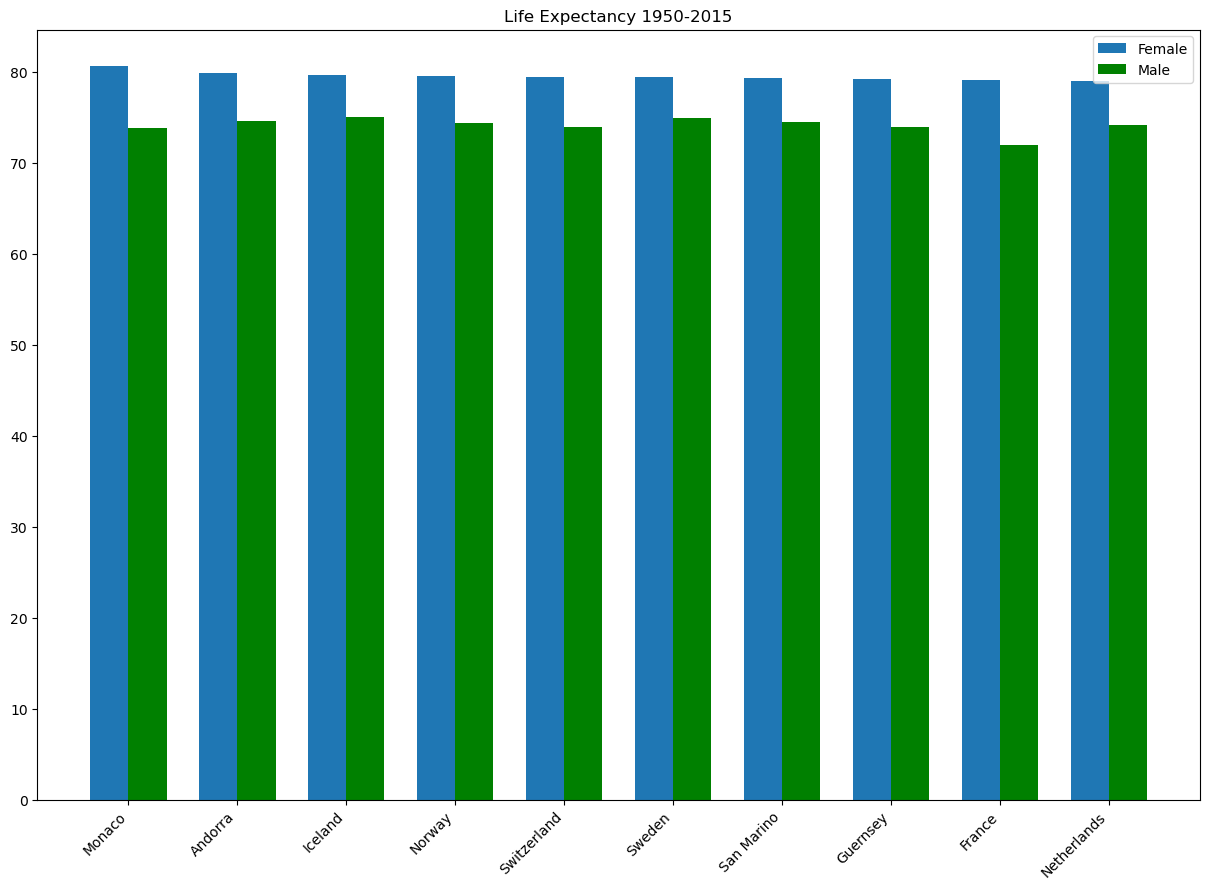

In [141]:
plt.figure(figsize=(15,10))
bar_width = 0.35
r1 = range(len(highest_life_expectancy))
r2 = [x + bar_width for x in r1]

plt.title('Life Expectancy 1950-2015')
plt.bar(r1, highest_life_expectancy['Female Life Expectancy'], width=bar_width, label='Female')
plt.bar(r2, highest_life_expectancy['Male Life Expectancy'], width=bar_width, color='green', label='Male')
plt.xticks([r+bar_width/2 for r in range(len(highest_life_expectancy))], 
           highest_life_expectancy.index, rotation=45, ha='right')
plt.legend()
plt.show()

In [92]:
# group all countries 
data_global_life = data.groupby('Year').agg({'Female Life Expectancy':'mean', 
                                             'Male Life Expectancy':'mean'})

In [63]:
data_global_life.tail()

,Female Life Expectancy,Male Life Expectancy
Year,,
2017,75.738559,70.520763
2018,75.974153,70.715678
2019,76.169492,70.916525
2020,75.698729,70.222034
2021,75.160593,69.712288


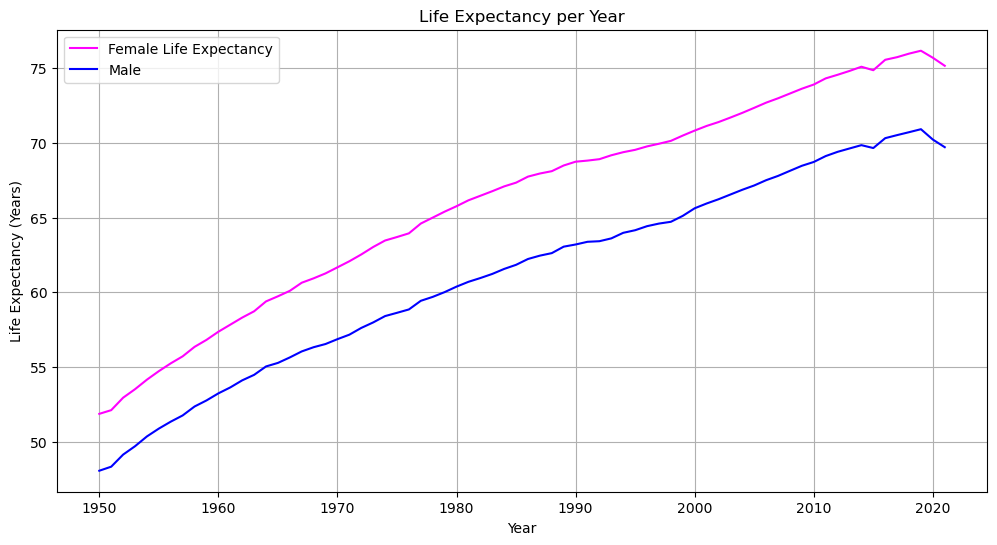

In [52]:
## plot the figure

plt.figure(figsize=(12, 6))
plt.title('Life Expectancy per Year')
plt.plot(data_global_life.index, data_global_life['Female Life Expectancy'],
        label='Female Life Expectancy', color='magenta')
plt.plot(data_global_life.index, data_global_life['Male Life Expectancy'],
        label='Male', color='blue')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.show()

In [53]:
data.head()

,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
0,Abkhazia,OWID_ABK,2015,66.168444,61.202554,2.131189e+07,-4.96589
1,Afghanistan,AFG,1950,28.400000,27.100000,7.480464e+06,-1.30000
2,Afghanistan,AFG,1951,28.600000,27.400000,7.571542e+06,-1.20000
3,Afghanistan,AFG,1952,29.100000,27.800000,7.667534e+06,-1.30000
4,Afghanistan,AFG,1953,29.600000,28.300000,7.764549e+06,-1.30000


In [157]:
indonesia_life_expectancy = data.loc[data['Country Code'] == 'IDN']

In [158]:
indonesia_life_expectancy.head(10)

,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
6991,Indonesia,IDN,1950,40.4,38.4,69567624.0,-2.0
6992,Indonesia,IDN,1951,40.9,38.7,71019350.0,-2.2
6993,Indonesia,IDN,1952,41.8,39.6,72570830.0,-2.2
6994,Indonesia,IDN,1953,42.5,40.3,74207990.0,-2.2
6995,Indonesia,IDN,1954,43.4,41.0,75925330.0,-2.4
6996,Indonesia,IDN,1955,44.0,41.8,77741510.0,-2.2
6997,Indonesia,IDN,1956,45.0,42.6,79661840.0,-2.4
6998,Indonesia,IDN,1957,45.7,43.3,81690984.0,-2.4
6999,Indonesia,IDN,1958,46.6,43.6,83818760.0,-3.0
7000,Indonesia,IDN,1959,47.3,44.4,86047670.0,-2.9


In [159]:
indonesia_life_expectancy.agg({'F'})

AttributeError: 'F' is not a valid function for 'Series' object

## TODO:
1. Determine whether the increase of life expectancy between earlier years make any difference. 5 Years Interval
2. Adding GDP per capita to each countries using country code. Data source: https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2020

“Data Page: GDP per capita”, part of the following publication: Max Roser, Pablo Arriagada, Joe Hasell, Hannah Ritchie and Esteban Ortiz-Ospina (2023) - “Economic Growth”. Data adapted from Bolt and van Zanden. Retrieved from https://ourworldindata.org/grapher/maddison-data-gdp-per-capita-in-2011us-slopechart [online resource]